## FE542 Time Series Analysis Homework /# 1

Justin Dano



In [1]:
# Modules used
import fix_yahoo_finance
import pylab

import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import statsmodels.api   as sm

from IPython.display               import display_html
from pandas_datareader             import data as pdr
from scipy.stats                   import skew, kurtosis, jarque_bera
from statsmodels.graphics.gofplots import qqplot_2samples
plt.style.use('ggplot')

### 4.1 Generate 1000 observations from an exponential distribution with mean 10

In [2]:
exp_dist = np.random.exponential(10, 1000)
len(exp_dist)

1000

### 4.2 Generate 1000 observations from a central t-distribution with 8 degrees of freedom

In [3]:
t_dist = np.random.standard_t(8, size=1000)
len(t_dist)

1000

### 4.3 Make a qqplot of observations of part 1 versus quantiles generated from a t-distribution with 8 degrees of freedom. Can the t-distribution be used to approximate data in part 1? Submit the plot

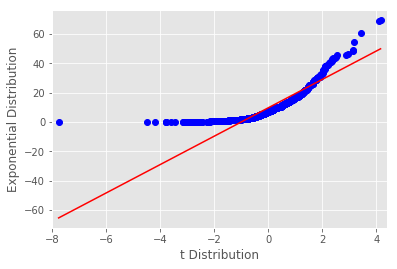

In [4]:
_ = qqplot_2samples(data1=exp_dist, data2=t_dist, xlabel='t Distribution', ylabel='Exponential Distribution', line='s')

The graph above is a quantile-quantile (q-q) plot of an expoential distribution and a t-distribution. It is clear from the graph that the t-distribution cannot be used approximate data from the exponential distribution. To be able to use the two distributions interchangeably, we would need the points to match closely with the horizontal line, (e.g. quantiles should be linear)

The line is standardized, which means the expected order statistics are scaled by their standard deviation of the sample and the mean added to them. More information can be found here:
http://www.statsmodels.org/devel/generated/statsmodels.graphics.gofplots.qqplot_2samples.html

### 4.4 Repeat 4.3 but submit a qqplot of the observations in 1 versus quantiles from an exponential with mean 1. What is your conclusion

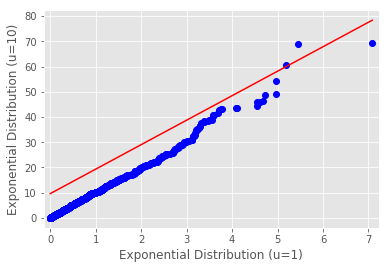

In [5]:
exp_dist2 = np.random.exponential(1, 1000)
_ = qqplot_2samples(data1=exp_dist, data2=exp_dist2, xlabel='Exponential Distribution (u=1)', ylabel='Exponential Distribution (u=10)', line='s')

Here we have two exponential distributions, one with mean of 1, the other with mean of 10. When they are compared with the q-q plot, it looks like their shape linear for the most part. We do notice that this linearity somewhat diverges for larger values of the two distributions. Since the mean affects how the standard deviation is calculated, the horizontal line reflects that offset with a upwards shift to compensate for the distribution with the larger mean. Overall, I would still not use one in place of the other given the non-linear shape for larger values.

### 5 Use Yahoo Finance and download
- Daily Data for past three years
- Weekly data for past five years
- Monthly data for past ten years

Calculate simple and continuously compounded returns for each dataset. Use ggplot to plot price. Have three windows side-by-side showing the graphs of each frequency. 

In [6]:
# Sometimes need to run this a few times as API does not always make connection on first try
ticker = 'AMZN'
TEN_YEARS_BACK = '2009-02-15'
FIVE_YEARS_BACK = '2014-02-15'
THREE_YEARS_BACK = '2016-02-15'
TODAY = '2019-02-15' 
data = pdr.get_data_yahoo(ticker, start=TEN_YEARS_BACK, end=TODAY)

In [7]:
def clean(data):
    """
    Adjust Column names and take the daily samples and convert to weekly, and monthly
        
        Params:
            data - Pandas.DataFrame
        Returns:
            tuple(Pandas.DataFrame) - Daily, Weekly, Monthly Sampled Dataframes from Yahoo Finance
    """
    data = data[['Adj Close']]
    data.columns = ['adj_close']
    daily = data[THREE_YEARS_BACK:]
    weekly = data.asfreq('W-MON', method='backfill')[FIVE_YEARS_BACK:]
    monthly = data.asfreq('M', method='backfill')
    return daily, weekly, monthly


def single_period_returns(df):
    """
    Calculates Gross and Log (Continuously Compounding) Returns
    Assumes dataframe is decreasing in time:
    2019-01-09
         |
    1998-01-02
        
        Params:
            df - Pandas.DataFrame [adj_close] 
        Returns:
            df - Pandas.DataFrame [adj_close, gross, log]      
    """
    price_df = df.copy()
    # Gross Returns
    price_df['gross'] = price_df.adj_close / price_df.adj_close.shift(-1)
    # Log AKA Continuously Compounded Return
    price_df['log'] = np.log(price_df.adj_close / price_df.adj_close.shift(-1))

    return price_df


def pandas_table_display(*dfs):
    ''' 
    Helper function that wraps dataframes into html allowing multiple dataframes 
    to be shown side-by-side for easy comparison 
        Params:
            dfs - tuple(Pandas.DataFrame)
    '''
    html = ''
    for df in dfs:
        html += df.to_html()
    display_html(html.replace('table','table style="display:inline"'), raw=True)

In [8]:
price_data = clean(data)

In [9]:
returns = [single_period_returns(i[::-1]) for i in price_data]
daily, weekly, monthly = returns
pandas_table_display(daily.head(), weekly.head(), monthly.head())

,adj_close,gross,log
Date,,,
2019-02-15,1607.949951,0.990941,-0.009101
2019-02-14,1622.650024,0.989421,-0.010636
2019-02-13,1640.000000,1.001215,0.001214
2019-02-12,1638.010010,1.029547,0.029119
2019-02-11,1591.000000,1.001750,0.001749
,adj_close,gross,log
Date,,,
2019-02-11,1591.000000,0.974096,-0.026246
2019-02-04,1633.310059,0.997204,-0.002800


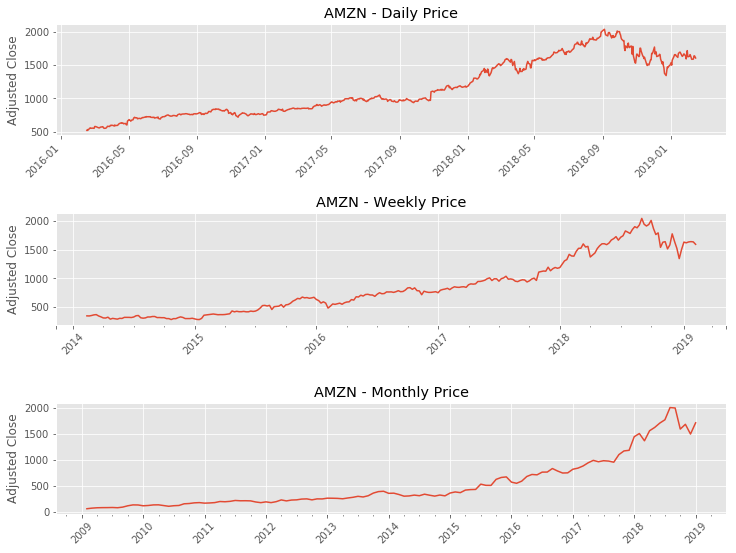

In [10]:
def make_plot(data, title):
    '''
        Params:
            data - Pandas.DataFrame [adj_close]
            title - String
    '''
    fig.subplots_adjust(hspace=.7)
    ax = data.adj_close.plot()
    ax.set_title(title)
    ax.axes.get_xaxis().set_label_text('')
    ax.axes.get_yaxis().set_label_text('Adjusted Close')
    plt.xticks(rotation=45)
    
fig = plt.figure(figsize=(12,10))
fig.add_subplot(311) 
make_plot(data=daily, title= ticker + ' - Daily Price')
fig.add_subplot(312) 
make_plot(data=weekly, title=ticker + ' - Weekly Price')
fig.add_subplot(313) 
make_plot(data=monthly, title=ticker + ' - Monthly Price')

### 5.1 Use qqplot and interpret the results

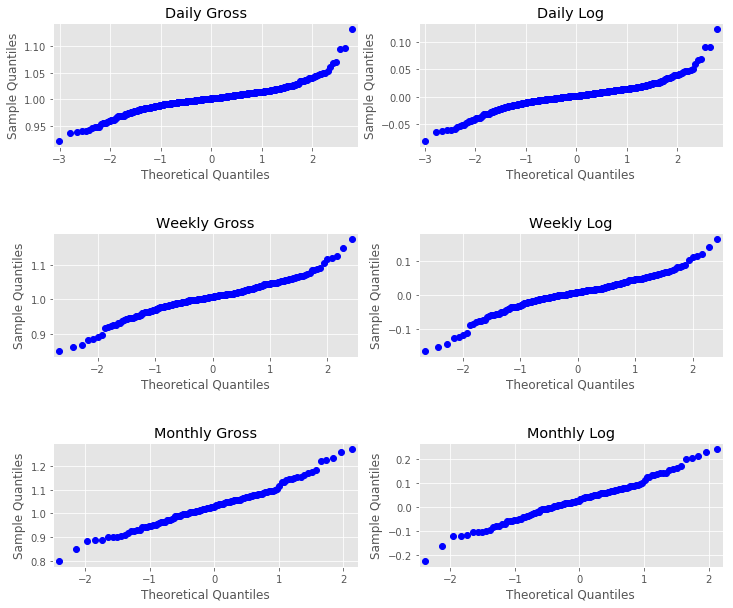

In [11]:
def plot_qq(data, axis, title):
    '''
    Plot QQ Plot using Plotly
        Params:
            data - Pandas.DataFrame [adj_close, gross, log]
            title - String
    '''
    fig.subplots_adjust(hspace=.7)
    sm.qqplot(data, ax=axis)
    axis.set_title(title)
    
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,10))
plot_qq(daily.gross, axes[0][0], 'Daily Gross')
plot_qq(daily.log, axes[0][1], 'Daily Log')
plot_qq(weekly.gross, axes[1][0], 'Weekly Gross')
plot_qq(weekly.log, axes[1][1], 'Weekly Log')
plot_qq(monthly.gross, axes[2][0], 'Monthly Gross')
plot_qq(monthly.log, axes[2][1], 'Monthly Log')

Here we can see that gross and continuously compounded returns have similar shapes in terms of their distribution. As we increase the frequency however it is noticeable  that returns become more normal (as the line appears to be more linear in shape). This follows our tuition as daily changes can be more volatile then the averages over longer periods of time.

### 5.2 Calculate Skewness and Kurtosis for each one of them

In [12]:
def calc_higher_moments(df, name):
    '''
    Calculate the skew and kurtosis for a distribution
        Params:
            df - Pandas.DataFrame [adj_close, gross, log]
            name - String 
        Returns:
            Pandas.DataFrame [adj_close, gross, log, skew, kurtosis]
    '''    
    df.dropna(inplace=True)
    stat_data = [{'skew': skew(df.gross), 'kurtosis': kurtosis(df.gross)}, 
                 {'skew': skew(df.log), 'kurtosis': kurtosis(df.log)}]  
    stat_df = pd.DataFrame(index=['gross', 'log'], columns=['skew', 'kurtosis'], data=stat_data)
    stat_df.index.name = name
    return stat_df

stats_daily = calc_higher_moments(daily, 'Daily Return')
stats_weekly = calc_higher_moments(weekly, 'Weekly Return')
stats_monthly = calc_higher_moments(monthly, 'Monthly Return')

In [13]:
pandas_table_display(stats_daily, stats_weekly, stats_monthly)

,skew,kurtosis
Daily Return,,
gross,0.568021,7.318965
log,0.338389,6.499657
,skew,kurtosis
Weekly Return,,
gross,-0.189979,2.172768
log,-0.463331,2.317062
,skew,kurtosis
Monthly Return,,
gross,0.285791,0.335755


This further strengthens our observations from the qqplots done in 5.1. We see the kurtotis decreasing as the term structure increases. Also, the kurtosis does not change much between gross and log returns. One thing in particular that is interesting is how the skew does not follow any standard pattern (decreases in weekly, then increases in monthly). This could be due to sampling error or not having enough observations to account for minor anomalies. 

### 5.3 Perform Jarque-Bera Normality test for each series and interpret the results

In [14]:
jb_dg = jarque_bera(daily.gross)
jb_dl = jarque_bera(daily.log)
jb_wg = jarque_bera(weekly.gross)
jb_wl = jarque_bera(weekly.log)
jb_mg = jarque_bera(monthly.gross)
jb_ml = jarque_bera(monthly.log)
print('Daily Gross Return - Test statistic is: {} and p-value is: {}'.format(     jb_dg[0], jb_dg[1] ))
print('Daily Log Return - Test statistic is: {} and p-value is: {}'.format(       jb_dl[0], jb_dl[1] ))
print('\nWeekly Gross Return - Test statistic is: {} and p-value is: {}'.format(  jb_wg[0], jb_wg[1] ))
print('Weekly Log Return - Test statistic is: {} and p-value is: {}'.format(      jb_wl[0], jb_wl[1] ))
print('\nMonthly Gross Return - Test statistic is: {} and p-value is: {}'.format( jb_mg[0], jb_mg[1] ))
print('Monthly Log Return - Test statistic is: {} and p-value is: {}'.format(     jb_ml[0], jb_ml[1] ))

Daily Gross Return - Test statistic is: 1728.021722725462 and p-value is: 0.0
Daily Log Return - Test statistic is: 1345.1623709231292 and p-value is: 0.0

Weekly Gross Return - Test statistic is: 52.70728387616496 and p-value is: 3.5872416148663433e-12
Weekly Log Return - Test statistic is: 67.46435567626125 and p-value is: 2.220446049250313e-15

Monthly Gross Return - Test statistic is: 2.1788803670852053 and p-value is: 0.3364047659271856
Monthly Log Return - Test statistic is: 0.4558736361919092 and p-value is: 0.7961745620711257


The Jarque-Bera Normality test will identify, based on the skew and kurtotis, whether our empirical data is normal. The higher the test statistic, the farther the data is from normal, which would have expected skewness of 0 and excess kurtosis of 0 as well. So our null hypothesis is skewness being zero and excess kurtosis being 0. With significance level of 5% (0.05)

Therefore, we are free to reject the null hypothesis for Daily, and Weekly returns, meaning that they do not follow a normal distribution with skew of 0 and excess kurtotsis of 0. For Monthly Gross and log returns, our p-values meet the threshold, accompanied with low test statistics which implies that these distributions may in fact resemble a normal distribution.